<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Tratamiento de datos Faltantes </font> </center>

El manejo de datos faltantes es un aspecto fundamental en el análisis de datos. Comprender la naturaleza de los datos faltantes permite seleccionar el método de imputación más adecuado y evitar sesgos en los resultados.


## Visualización de Datos Faltantes

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv('API_SI.POV.DDAY_DS2.csv',encoding='latin-1',sep='\t')
df.head(10)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   1960          0 non-null      float64
 3   1961          0 non-null      float64
 4   1962          0 non-null      float64
 5   1963          0 non-null      float64
 6   1964          0 non-null      float64
 7   1965          0 non-null      float64
 8   1966          0 non-null      float64
 9   1967          1 non-null      float64
 10  1968          0 non-null      float64
 11  1969          1 non-null      float64
 12  1970          0 non-null      float64
 13  1971          1 non-null      float64
 14  1972          0 non-null      float64
 15  1973          0 non-null      float64
 16  1974          2 non-null      float64
 17  1975          2 non-null      float64
 18  1976          0 non-null      

In [18]:
# Mapa de calor
dfcopy=df.copy()
dfcopy=dfcopy.isna()
dfcopy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


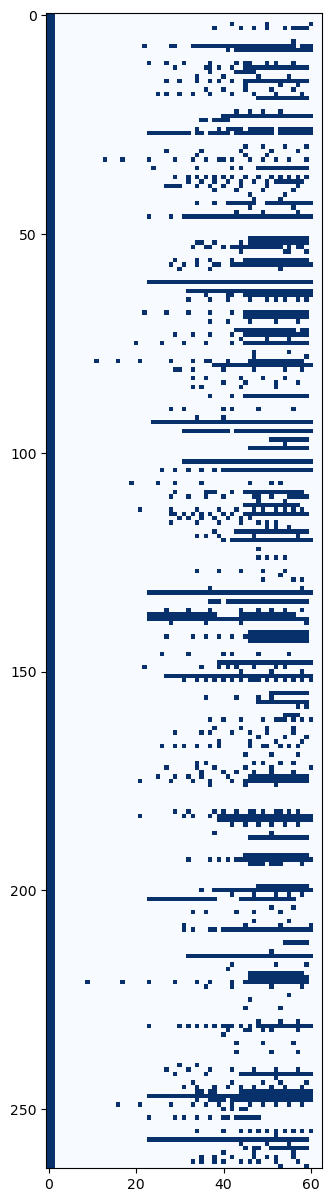

In [19]:
plt.figure(figsize=(5,15))
#plt.imshow(dfcopy,cmap='Blues') # En azul los datos perdidos
plt.imshow(~dfcopy,cmap='Blues') # En blanco los datos perdidos

#### Librería para visualización

In [ ]:
# Instalación de missingno si es necesario
#!pip install missingno

In [24]:
# Visualización de datos faltantes con missingno
import missingno as msno
titanic_df = sns.load_dataset('titanic')

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

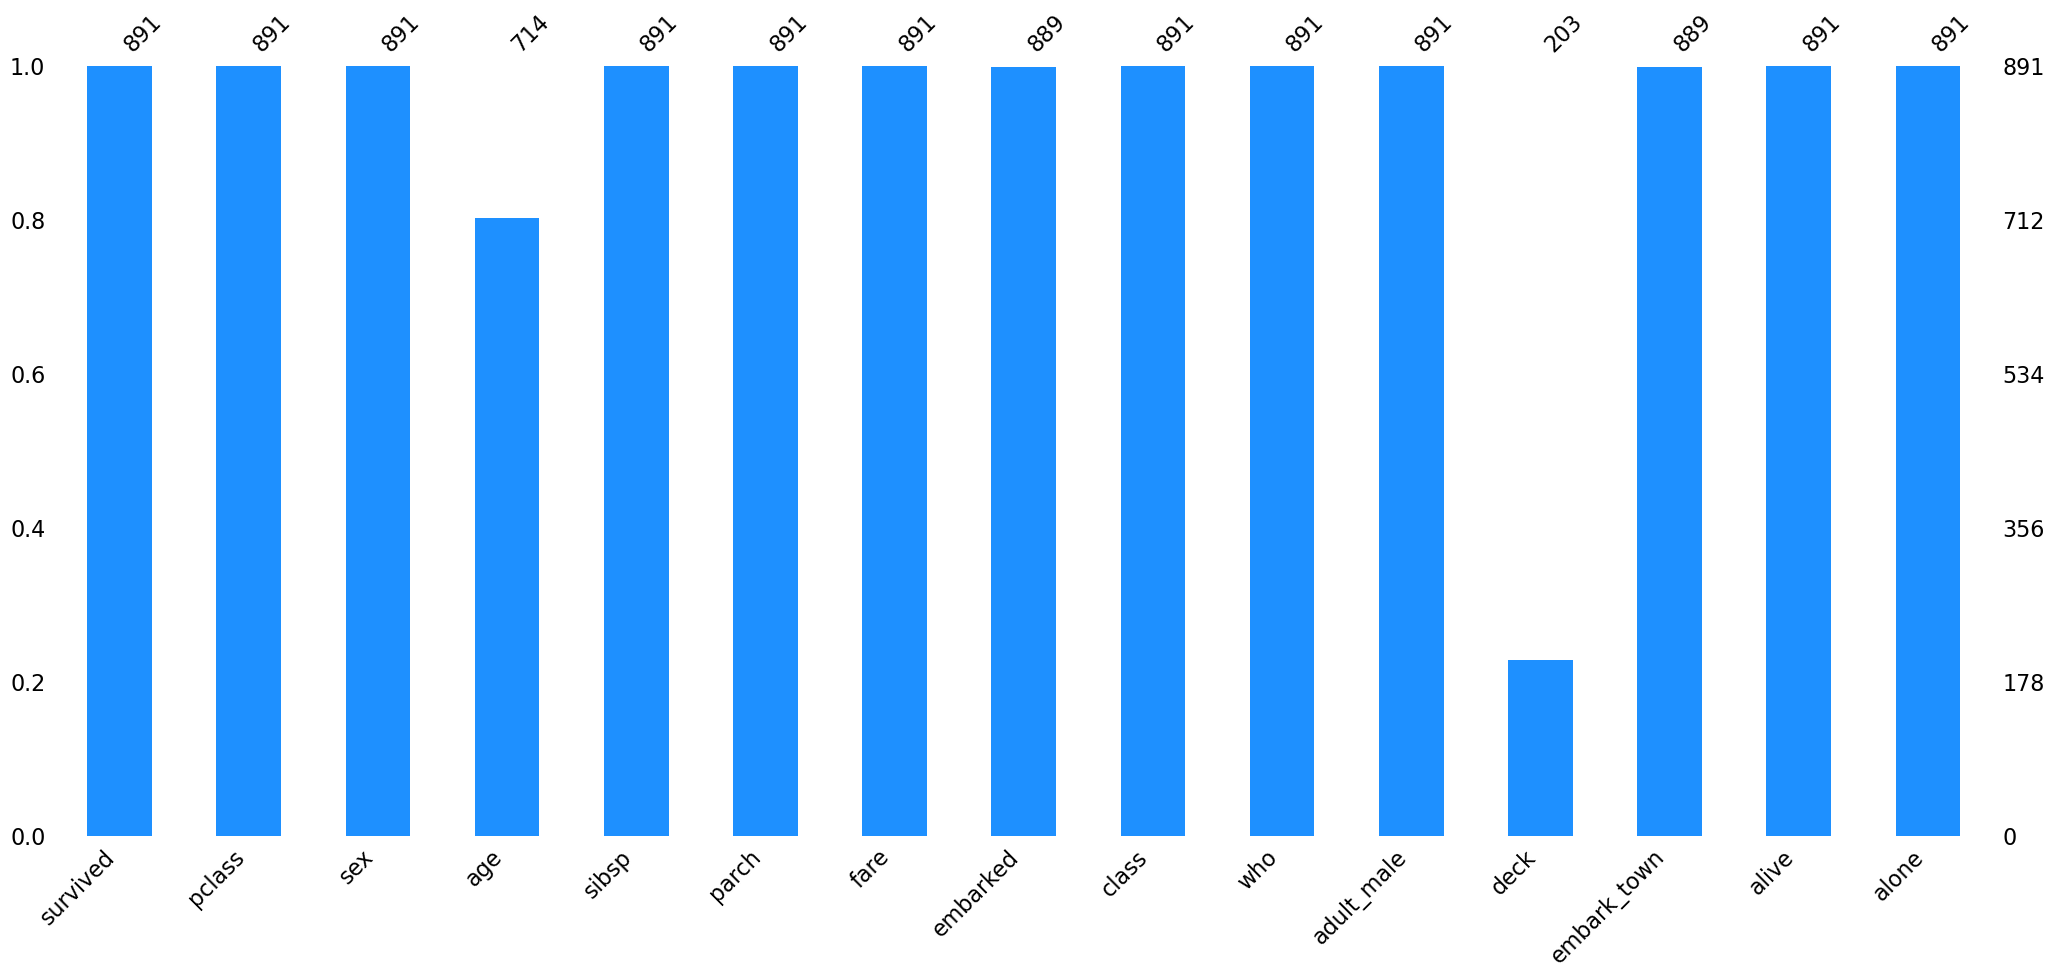

In [220]:
#Bar plot 
msno.bar(titanic_df, color='dodgerblue')
#color='steelblue')
#color="tomato")
#color="tab:green")

<Axes: >

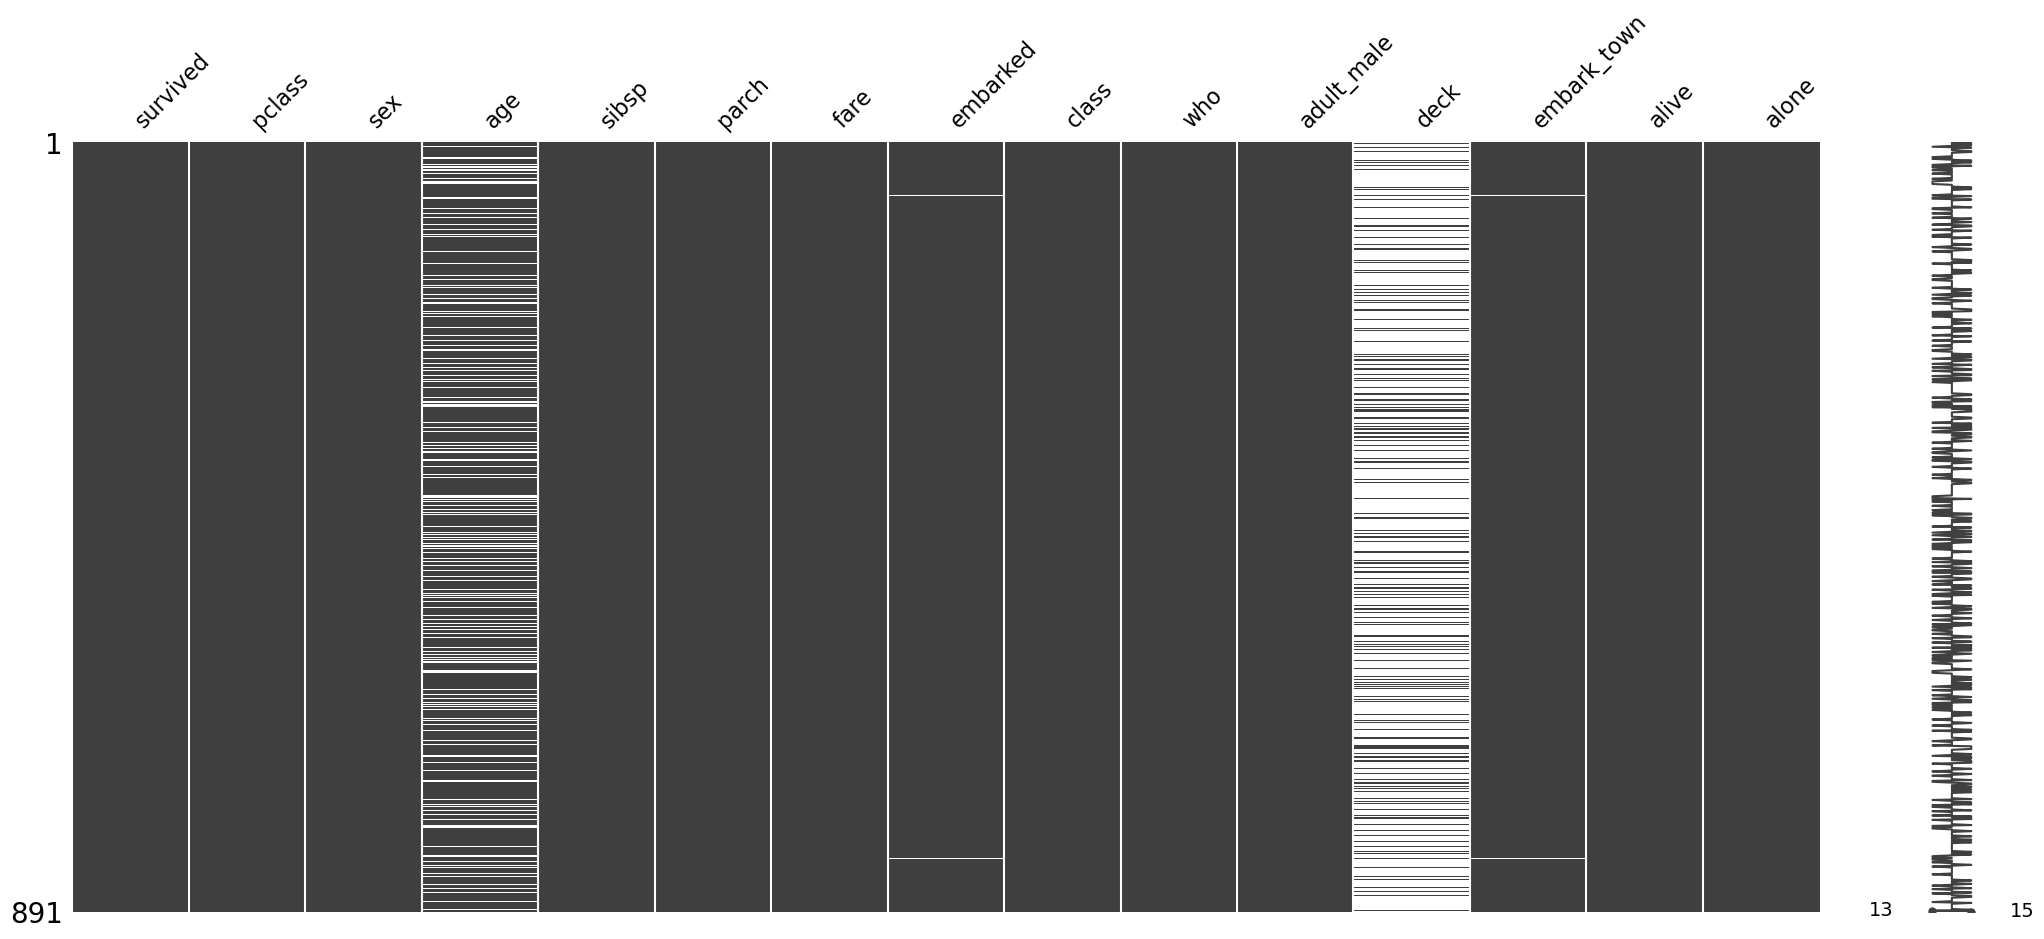

In [26]:
msno.matrix(titanic_df)

## Clasificación de Datos Faltantes

Rubin (1976) propuso una clasificación ampliamente aceptada de los mecanismos de datos faltantes:

> **MCAR (Missing Completely At Random)**: Los datos faltantes ocurren completamente al azar y no dependen ni de los valores observados ni de los no observados.

> **MAR (Missing At Random)**: La probabilidad de que un dato esté ausente depende solo de los valores observados, no de los valores faltantes.

> **MNAR (Missing Not At Random)**: La probabilidad de que un dato esté ausente depende de los valores faltantes en sí mismos, incluso después de considerar los valores observados.
 
<img src="Figures/tipo_faltante.png" width="600" height="600">

[https://towardsdatascience-com.translate.goog/missing-value-imputation-explained-a-visual-guide-with-code-examples-for-beginners-93e0726284eb/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc]('liga')

### MCAR (Missing Completely at Random)
MCAR es el más sencillo de los tres. Un conjunto de datos es MCAR si la probabilidad de que falte un dato es igual para todos los individuos y no depende de las medidas de otras variables, es decir, no existe ninguna relación entre que un dato sea faltante u observado.

**Ejemplo**:
- Partiendo de una tabla de una base de datos, si ocurre un problema informático y se pierden algunos valores de algunas observaciones de forma aleatoria tendríamos pérdida MCAR.

- En una encuesta, algunas personas omiten una pregunta por accidente, sin relación con sus características o respuestas.

- [Iris (UCI Machine Learning Repository)](https://archive.ics.uci.edu/ml/datasets/iris). Si se eliminan filas aleatoriamente o se simulan valores faltantes en cualquier columna sin relación con las variables, los datos faltantes serían MCAR.

- [Wine Quality (UCI)](https://archive.ics.uci.edu/ml/datasets/wine+quality). Si durante la medición de la calidad del vino, algunos sensores fallan aleatoriamente y se pierden datos de variables químicas sin relación con otras variables o con la calidad.

Para comprobar si un conjunto de datos tiene una pérdida MCAR podemos emplear el [test de Litle](https://bpb-us-w2.wpmucdn.com/blog.nus.edu.sg/dist/4/6502/files/2018/06/mcartest-zlxtj7.pdf)



In [1]:
# Ejemplo MCAR: Simulación
import numpy as np
import pandas as pd

np.random.seed(42)
data = pd.DataFrame({
    'edad': np.random.randint(20, 60, 100),
    'ingreso': np.random.randint(20000, 80000, 100)
})
# Introducimos valores faltantes aleatoriamente (MCAR)
mask = np.random.rand(*data.shape) < 0.1
data_mcar = data.mask(mask)
print('Datos con valores faltantes MCAR:')
print(data_mcar.head())

Datos con valores faltantes MCAR:
   edad  ingreso
0  58.0      NaN
1  48.0  55222.0
2  34.0  31837.0
3  27.0  34039.0
4  40.0  78148.0


In [30]:
msno.heatmap?

Signature:
msno.heatmap(
    df,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(20, 12),
    fontsize=16,
    labels=True,
    label_rotation=45,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    cbar=True,
    ax=None,
)
Docstring:
Presents a `seaborn` heatmap visualization of nullity correlation in the given DataFrame.

Note that this visualization has no special support for large datasets. For those, try the dendrogram instead.

:param df: The DataFrame whose completeness is being heatmapped.
:param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
:param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
:param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
:param sort: The column sort order to apply. Can be "ascending", "desc

#### Prueba de Little para MCAR (Little's MCAR Test)

La prueba de Little (Little's MCAR test) es un método estadístico para evaluar si los datos faltantes son MCAR (Missing Completely At Random). Si el valor p es alto (por ejemplo, > 0.05), no se rechaza la hipótesis nula de que los datos son MCAR.

<Axes: >

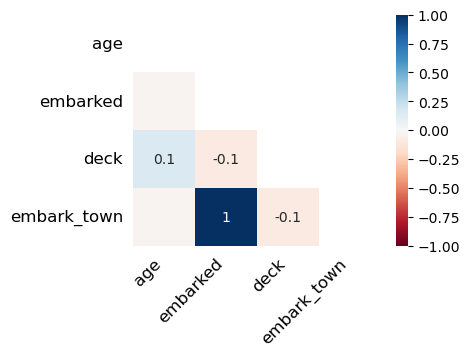

In [221]:
msno.heatmap(titanic_df, figsize=(4,3),fontsize=12)

## MAR (Missing At Random)

Un conjunto de datos tiene pérdida MAR cuando la probabilidad de que una varibale tenga datos faltantes es independiente de los valores de la misma variable, pero dependiente de los valores de otras variables presentes en el conjunto de datos. La probabilidad de que un dato esté ausente depende solo de los valores observados, no de los valores faltantes

**Ejemplo**
- Partiendo de un estudio en el que tenemos las variables puesto de trabajo y sueldo, estaríamos con una pérdida MAR si la gente con determinados puestos de trabajo fuera más reacia a contestar a la pregunta del sueldo.
  
- En un estudio médico, las personas mayores tienden a omitir preguntas sobre ingresos, pero dentro de cada grupo de edad, la omisión es aleatoria.

- [Medical Expenditure Panel Survey (MEPS)](https://meps.ahrq.gov/mepsweb/). La variable 'gastos médicos' puede faltar más frecuentemente en personas jóvenes, pero dentro de cada grupo de edad, la omisión es aleatoria.

- [Titanic (Kaggle)](https://www.kaggle.com/c/titanic/data). En el dataset Titanic, la variable 'Age' tiene valores faltantes. La probabilidad de que falte la edad depende de otras variables observadas como 'Pclass' o 'Sex'. Por ejemplo, es más probable que falte la edad en pasajeros de tercera clase.

Si los datos son MAR, se pueden usar métodos de imputación más sofisticados (como imputación múltiple) para obtener estimaciones no sesgadas.


In [35]:
# Ejemplo MAR: Simulación
data_mar = data.copy()
# Si la edad es mayor a 50, hay más probabilidad de que ingreso sea NaN
prob = np.where(data_mar['edad'] > 50, 0.4, 0.05)
mask = np.random.rand(len(data_mar)) < prob
data_mar.loc[mask, 'ingreso'] = np.nan
print('Datos con valores faltantes MAR:')
print(data_mar.head(10))

Datos con valores faltantes MAR:
   edad  ingreso
0    58  43599.0
1    48  55222.0
2    34  31837.0
3    27  34039.0
4    40  78148.0
5    58  50818.0
6    38  39115.0
7    42  30965.0
8    30  44538.0
9    30  62530.0


##  MNAR (missing not at random)
Tenemos el caso de MNAR cuando la probabilidad de que una observación sea dato faltante es dependiente del valor de la propia variable. Su efecto no se puede ignorar ya que el valor faltante está relacionado con la razón por la que falta el dato.

**Ejemplo**

- En un estudio acerca de malos hábitos alimenticios, si algunas personas con esos malos hábitos fueran menos propensas a contestar las preguntas.
- En una encuesta de ingresos, las personas con ingresos muy altos tienden a no responder la pregunta sobre ingresos.
- [NHANES (National Health and Nutrition Examination Survey)](https://wwwn.cdc.gov/nchs/nhanes/). En encuestas de salud, las personas con mayor peso pueden ser menos propensas a reportar su peso. Así, los valores faltantes en la variable 'peso' dependen del propio peso (no observado).
- [European Social Survey (ESS)](https://www.europeansocialsurvey.org/). Preguntas sensibles como 'uso de drogas' o 'salud mental' pueden tener faltantes porque quienes tienen valores extremos tienden a no responder.

In [36]:
# Ejemplo MNAR: Simulación
data_mnar = data.copy()
# Mayor probabilidad de ser NaN si el ingreso es alto
prob = (data_mnar['ingreso'] > 60000).astype(float) * 0.5 + 0.05
mask = np.random.rand(len(data_mnar)) < prob
data_mnar.loc[mask, 'ingreso'] = np.nan
print('Datos con valores faltantes MNAR:')
print(data_mnar.head(10))

Datos con valores faltantes MNAR:
   edad  ingreso
0    58  43599.0
1    48  55222.0
2    34  31837.0
3    27  34039.0
4    40  78148.0
5    58  50818.0
6    38  39115.0
7    42  30965.0
8    30  44538.0
9    30  62530.0


#### Resumen Comparativo

| Tipo  | ¿Depende de valores observados? | ¿Depende de valores faltantes? | Ejemplo típico |
|-------|:------------------------------:|:-----------------------------:|:--------------:|
| MCAR  | No                             | No                            | Omisión accidental |
| MAR   | Sí                             | No                            | Omisión por grupo observado |
| MNAR  | Sí/No                          | Sí                            | Omisión por valor oculto |



# Métodos básicos para tratamiento de datos faltantes

## Análisis con datos completos (listwise)
Es un método muy habitual y sencillo de utilizar. Consiste en eliminar todas las observaciones que contengan algún valor faltante en alguna variable del conjunto de datos, es decir, para realizar el análisis estadístico solo se usarían las observaciones que disponen de todos los valores.

**Ejemplo:** 
Partamos de un dataset $X$ con $k = 3$ variables y $n = 100$ observaciones. Una variable tendrá valores faltantes $(p = 1)$ en $m = 10$ observaciones. Si realizamos un análisis con datos completos estaríamos eliminando los datos de las m observaciones con valores faltantes y nuestro dataset pasaría de $n = 100$ observaciones a $n − m = 90$ observaciones.

- Si la pérdida del conjunto de datos es MCAR, los resultados del análisis serán insesgados pues se trataría de una muestra aleatoria de los datos. La desventaja es que no es habitual la presencia de una pérdida MCAR y el análisis sería insesgado en el resto de los casos. 

- Otra desventaja es que se puede perder mucha información, sobre todo si se tienen muchas variables con valores faltantes. Siguiendo con el ejemplo anterior, si tuviéramos un 10% de datos faltantes en cada una de las 3 variables podríamos llegar a eliminar hasta el 30% de las observaciones.

In [47]:
dfcopy.head() #dataset indicando valores faltantes

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [48]:
dfcopy.sum() #valores faltantes

Country Name      0
Country Code      0
1960            264
1961            264
1962            264
               ... 
2016            176
2017            185
2018            227
2019            264
2020            264
Length: 63, dtype: int64

In [55]:
np.where(df1.sum()>263)[0]

array([ 2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 15, 18, 61, 62],
      dtype=int64)

In [57]:
# Definir un threshold de valores faltantes a eliminar por registros y variables
df1=dfcopy.copy()
var=np.where(df1.sum()>263)[0]
obs=np.where(df1.sum(axis=1)>60)[0]
df2=df.drop(index=obs,columns=df.columns[var])
df2.head()

,Country Name,Country Code,1967,1969,1971,1974,1975,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.8,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.0,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4


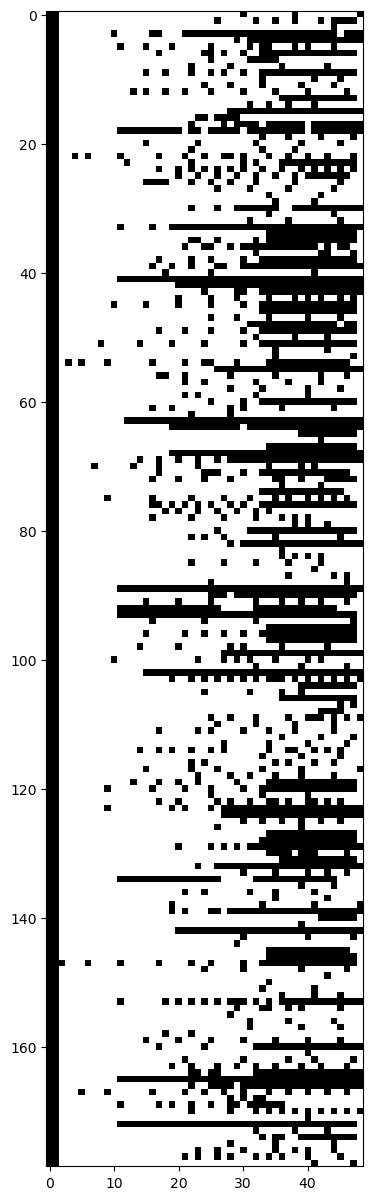

In [59]:
#Visualización de datos faltantes después de la eliminación
df1NaN=df2.isna()
plt.figure(figsize=(5,15))
plt.imshow(~df1NaN,cmap='Greys')

In [116]:
#Eliminación de datos por registros y variables
# Simulando un Dataset con valores faltantes
df_data=pd.DataFrame(np.random.randn(100,4)+10*np.random.rand(4),columns=['A','B','C','D'])
for c in df_data.columns[:-1]:
    inan=np.random.randint(100,size=np.random.randint(20))
    df_data.loc[inan, c]=np.NaN

In [117]:
df_data

,A,B,C,D
0,7.320252,8.661557,5.109316,11.129444
1,9.092771,10.295635,3.519647,8.124685
2,6.743070,8.810994,NaN,10.026296
3,6.536878,8.285013,2.659723,9.095990
4,6.693094,9.522072,2.541187,8.478417
...,...,...,...,...
95,7.942027,9.895189,NaN,9.712392
96,5.858707,8.757824,2.692156,10.193613
97,6.705620,8.686881,3.775008,9.098224
98,8.523019,9.406432,3.624352,9.574365


In [118]:
# Eliminación de filas (Observaciones)
df_data.dropna()

,A,B,C,D
0,7.320252,8.661557,5.109316,11.129444
1,9.092771,10.295635,3.519647,8.124685
3,6.536878,8.285013,2.659723,9.095990
4,6.693094,9.522072,2.541187,8.478417
5,7.681547,11.131653,4.100023,8.987201
...,...,...,...,...
94,5.461199,8.656250,2.643918,9.673027
96,5.858707,8.757824,2.692156,10.193613
97,6.705620,8.686881,3.775008,9.098224
98,8.523019,9.406432,3.624352,9.574365


In [119]:
# Eliminación de columnas (Variables)
df_data.dropna(axis=1)

,A,D
0,7.320252,11.129444
1,9.092771,8.124685
2,6.743070,10.026296
3,6.536878,9.095990
4,6.693094,8.478417
...,...,...
95,7.942027,9.712392
96,5.858707,10.193613
97,6.705620,9.098224
98,8.523019,9.574365


## Métodos de Imputación

Otra forma de tratar los valores faltantes es imputar el valor faltante por un valor. Se usa la información presente en los valores observados para establecer un valor en aquellos valores no observados. Es importante saber elegir bien el método de imputación ya que cada uno tiene sus ventajas e inconvenientes.

- A la hora de hacer la imputación es importante mantener la consistencia de los datos. También es necesario mantener las distribuciones de las variables, así como sus correlaciones para evitar una distorsión de los datos.

### Imputación por un métricas centrales de posición

#### Imputación por la media
Sustituye los valores faltantes de cada variable por la media muestral de la propia variable.

- Este método funciona bien bajo el supuesto de datos MCAR.

-  No funciona bien cuando los valores faltantes dependen de otra variable. Esto es porque si se sustituyen los datos faltantes por la media, estaríamos reduciendo la varianza de cada variable y, por ende, también se modifcarían las matrices de covarianza y de correlaciones.

- Otra desventaja de este procedimiento es que tan solo es aplicable a variables cuantitativas y no a a variables cualitativas.


In [137]:
# Crear un DataFrame de ejemplo
data = {
    'A': [1, 2, None, 4],
    'B': [5, None, None, 8],
    'C': [9, 10, 11, 12]
}
df = pd.DataFrame(data)
print('DataFrame original:')
print(df)

DataFrame original:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12


In [138]:
# Imputar con la media
df_mean = df.fillna(df.mean(numeric_only=True))
print('Imputación con la media:')
print(df_mean)

Imputación con la media:
          A    B   C
0  1.000000  5.0   9
1  2.000000  6.5  10
2  2.333333  6.5  11
3  4.000000  8.0  12


In [139]:
from sklearn.impute import SimpleImputer

# Imputar con la media
imp_mean = SimpleImputer(strategy='mean')
print('\nImputación con la media:')
print(pd.DataFrame(imp_mean.fit_transform(df_mean), columns=df_mean.columns))



Imputación con la media:
          A    B     C
0  1.000000  5.0   9.0
1  2.000000  6.5  10.0
2  2.333333  6.5  11.0
3  4.000000  8.0  12.0


array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

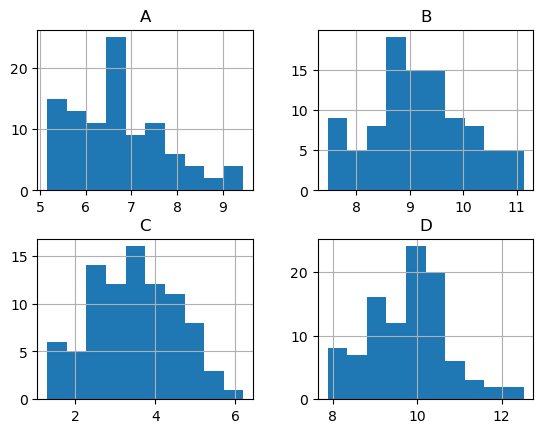

In [140]:
#no modifica las distribuciones
df_data.hist()

In [141]:
m=df_data.mean()
s=df_data.std(ddof=0)
m

A    6.750109
B    9.172787
C    3.491547
D    9.790102
dtype: float64

In [142]:
dfm=df_data.copy()
dfm.fillna(m,inplace=True)
dfm.head()

,A,B,C,D
0,7.320252,8.661557,5.109316,11.129444
1,9.092771,10.295635,3.519647,8.124685
2,6.743070,8.810994,3.491547,10.026296
3,6.536878,8.285013,2.659723,9.095990
4,6.693094,9.522072,2.541187,8.478417


In [143]:
m-dfm.mean()

A    0.000000e+00
B    0.000000e+00
C   -8.881784e-16
D    0.000000e+00
dtype: float64

In [144]:
s-dfm.std(ddof=0)

A    0.000000
B    0.008973
C    0.065851
D    0.000000
dtype: float64

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

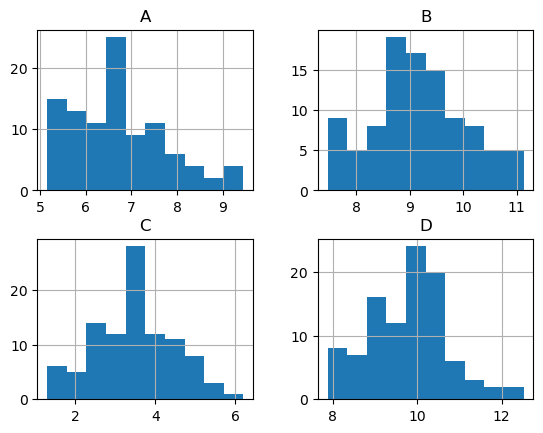

In [145]:
dfm.hist()

#### Imputación por la mediana

Se trata de un procedimiento similar al de la media, con la diferencia de que se sustituyen los valores de cada variable por la mediana de la propia variable. 

- **ventaja:** la imputación por la mediana es más robusta a la aparición de datos atípicos. Al igual que la imputación por la media funciona bien bajo el supuesto MCAR.
- Si no es MCAR, estaríamos reduciendo mucho la varianza de cada variable y modifcando las matrices de covarianza y correlaciones. También es aplicable sólo a variables cuantitativas.
- No recomendable si los datos están sesgados.

In [146]:
# Imputar con la mediana
df_median = df.fillna(df.median(numeric_only=True))
print('\nImputación con la mediana:')
print(df_median)


Imputación con la mediana:
     A    B   C
0  1.0  5.0   9
1  2.0  6.5  10
2  2.0  6.5  11
3  4.0  8.0  12


In [147]:
# Imputar con la mediana
imp_median = SimpleImputer(strategy='median')
print('\nImputación con la mediana:')
print(pd.DataFrame(imp_median.fit_transform(df_median), columns=df_median.columns))


Imputación con la mediana:
     A    B     C
0  1.0  5.0   9.0
1  2.0  6.5  10.0
2  2.0  6.5  11.0
3  4.0  8.0  12.0


In [148]:
#No modifica la dist
me=df_data.median()
me

A    6.744994
B    9.180842
C    3.486035
D    9.861912
dtype: float64

In [149]:
dfme=df_data.copy()
dfme.fillna(me,inplace=True)
dfme.head()

,A,B,C,D
0,7.320252,8.661557,5.109316,11.129444
1,9.092771,10.295635,3.519647,8.124685
2,6.743070,8.810994,3.486035,10.026296
3,6.536878,8.285013,2.659723,9.095990
4,6.693094,9.522072,2.541187,8.478417


In [150]:
me-dfme.median()

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>]],
      dtype=object)

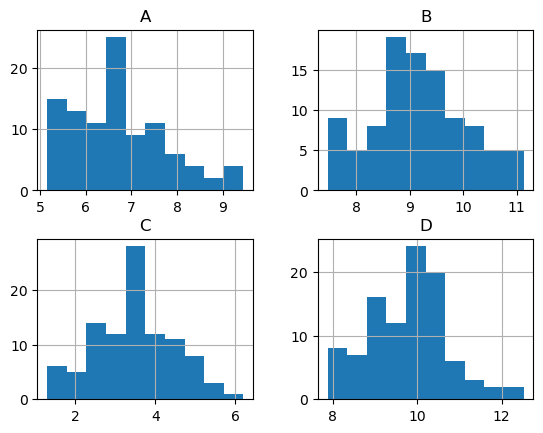

In [151]:
dfme.hist()

#### Imputación por la moda

Procedimiento muy similar a los dos descritos anteriormente, con la diferencia de que se imputa con el valor más frecuente o moda.

- Se puede usar para imputar las variables cualitativas o categóricas. Por el contrario, no es recomendable usarlo para imputar variables cuantitativas pues la media o mediana son una mejor representación de este tipo de variables. 
- **Desventaja:** Puede reducir la varianza de los datos, no considera la relación entre variables, no recomendable si los datos están sesgados.

In [152]:
# Imputar con la moda
mode = df.mode().iloc[0]
df_mode = df.fillna(mode)
print('\nImputación con la moda:')
print(df_mode)


Imputación con la moda:
     A    B   C
0  1.0  5.0   9
1  2.0  5.0  10
2  1.0  5.0  11
3  4.0  8.0  12


In [153]:
# Imputar con la moda
imp_mode = SimpleImputer(strategy='most_frequent')
print('\nImputación con la moda:')
print(pd.DataFrame(imp_mode.fit_transform(df_mode), columns=df_mode.columns))


Imputación con la moda:
     A    B     C
0  1.0  5.0   9.0
1  2.0  5.0  10.0
2  1.0  5.0  11.0
3  4.0  8.0  12.0


In [156]:
#otro ejemplo
# Seleccionar columnas categóricas con valores faltantes
df_mo_titanic= titanic[['embarked', 'deck', 'embark_town']].copy()
print(df.isnull().sum())


embarked         2
deck           688
embark_town      2
dtype: int64


In [160]:
df_mo_titanic.head()

,embarked,deck,embark_town
0,S,NaN,Southampton
1,C,C,Cherbourg
2,S,NaN,Southampton
3,S,C,Southampton
4,S,NaN,Southampton


In [162]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.isnull().sum()

embarked       0
deck           0
embark_town    0
dtype: int64

In [161]:
df_imputed.head()

,embarked,deck,embark_town
0,S,C,Southampton
1,C,C,Cherbourg
2,S,C,Southampton
3,S,C,Southampton
4,S,C,Southampton


#### Imputación Adelante (Forward Fill) y Atrás (Backward Fill)

Consiste en rellenar los valores faltantes con el valor anterior (forward fill) o posterior (backward fill). Efectivos para rellenar valores faltantes en series temporales o datos ordenados.

##### Imputación Adelante (Forward Fill)

Consiste en reemplazar cada valor faltante con el último valor observado previamente en la serie.

Formalmente, para una serie $x_1, x_2, \ldots, x_n$ con valores faltantes, la imputación adelante se define como:

$$
x_t = \begin{cases}
    x_t, & \text{si } x_t \text{ no es faltante} \\
    x_{t-1}^{*}, & \text{si } x_t \text{ es faltante}
\end{cases}
$$

donde $x_{t-1}^{*}$ es el valor imputado más reciente antes de $t$.

##### Imputación Atrás (Backward Fill)

Consiste en reemplazar cada valor faltante con el siguiente valor observado en la serie.

$$
x_t = \begin{cases}
    x_t, & \text{si } x_t \text{ no es faltante} \\
    x_{t+1}^{*}, & \text{si } x_t \text{ es faltante}
\end{cases}
$$

donde $x_{t+1}^{*}$ es el siguiente valor observado después de $t$.

**Desventajas:**
- Puede propagar errores si hay secuencias largas de valores faltantes.
- No recomendable para datos no ordenados.

In [67]:
# Crear una serie temporal con valores faltantes
np.random.seed(0)
dates = pd.date_range('2023-01-01', periods=20)
values = np.random.randn(20).cumsum()
series = pd.Series(values, index=dates)

# Introducir valores faltantes
series.iloc[[3, 4, 10, 11, 12, 17]] = np.nan
print('Serie original con valores faltantes:')
print(series)


Serie original con valores faltantes:
2023-01-01     1.764052
2023-01-02     2.164210
2023-01-03     3.142948
2023-01-04          NaN
2023-01-05          NaN
2023-01-06     6.274121
2023-01-07     7.224209
2023-01-08     7.072852
2023-01-09     6.969633
2023-01-10     7.380232
2023-01-11          NaN
2023-01-12          NaN
2023-01-13          NaN
2023-01-14     9.861262
2023-01-15    10.305125
2023-01-16    10.638799
2023-01-17    12.132878
2023-01-18          NaN
2023-01-19    12.240788
2023-01-20    11.386692
Freq: D, dtype: float64


In [68]:
# Imputación adelante (forward fill)
series_ffill = series.ffill()
# Imputación atrás (backward fill)
series_bfill = series.bfill()


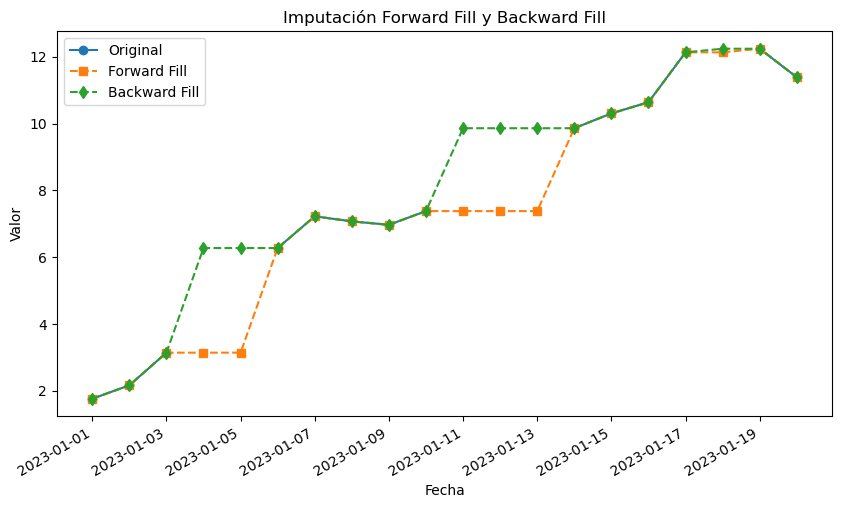

In [70]:
# Visualización
plt.figure(figsize=(10,5))
plt.plot(series, 'o-', label='Original')
plt.plot(series_ffill, 's--', label='Forward Fill')
plt.plot(series_bfill, 'd--', label='Backward Fill')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.title('Imputación Forward Fill y Backward Fill')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

- Es recomendable usar estos métodos solo cuando los datos tienen un orden natural (por ejemplo, tiempo).
- Si los valores faltantes están al inicio o final de la serie, forward fill o backward fill pueden no imputar todos los valores.
- Se pueden combinar ambos métodos para imputar valores al inicio y final:

```python
serie_imputada = serie.ffill().bfill()
```

### Imputación Hot Deck y Cold Deck

La imputación Hot Deck y Cold Deck son técnicas utilizadas para rellenar valores faltantes especialmente en encuestas y estudios sociales. Ambas se basan en reemplazar valores faltantes con valores observados de otros registros, pero difieren en la fuente de los datos donantes.

#### Imputación Hot Deck

Consiste en reemplazar cada valor faltante con un valor observado de otro registro dentro del mismo conjunto de datos (el "deck caliente"). El donante puede seleccionarse aleatoriamente, por proximidad, o por pertenencia a un grupo similar.

$$x_{i,\text{imputado}} = x_{j,\text{observado}}, \quad j \in \mathcal{D}, \quad j \neq i$$
donde $\mathcal{D}$ es el conjunto de donantes válidos. Usando este método tenemos la ventaja de que sirve tanto para variables categóricas como numéricas, también que se preserva la distribución de cada variable.

#### Imputación Cold Deck

Similar a Hot Deck, pero los valores donantes provienen de un conjunto de datos externo o de una fuente histórica (el "deck frío").

$$x_{i,\text{imputado}} = x_{k,\text{externo}}, \quad k \in \mathcal{D}_{\text{externo}}$$

donde $\mathcal{D}_{\text{externo}}$ es el conjunto de donantes del dataset externo.

**Hot Deck:** Mantiene la coherencia interna del dataset. Puede preservar la distribución y relaciones entre variables. Puede ser aleatorio o basado en similitud.

**Cold Deck:** Útil cuando se dispone de fuentes externas confiables. Puede introducir sesgos si los datos externos no son comparables.

**Desventajas:**
- Puede ser sensible a la selección de donantes.
- Podría incurrir en sesgos en las estimaciones de las correlaciones de las variables

In [71]:
# Simulación de datos
np.random.seed(42)
df = pd.DataFrame({
    'edad': np.random.randint(18, 65, 20),
    'ingreso': np.random.randint(10000, 50000, 20)
})
# Introducir valores faltantes
df.loc[[2, 5, 7, 12], 'ingreso'] = np.nan
print('Datos originales con valores faltantes:')
print(df)

Datos originales con valores faltantes:
    edad  ingreso
0     56  12433.0
1     46  15311.0
2     32      NaN
3     60  49188.0
4     25  27568.0
5     38      NaN
6     56  38693.0
7     36      NaN
8     40  37480.0
9     28  35658.0
10    28  28942.0
11    41  28431.0
12    53      NaN
13    57  10189.0
14    41  29118.0
15    20  45773.0
16    39  11899.0
17    19  11267.0
18    41  41551.0
19    61  21394.0


In [72]:
# Imputación Hot Deck aleatoria
df_imp_hotdeck = df.copy()
donantes = df['ingreso'].dropna()
for idx in df_imp_hotdeck[df_imp_hotdeck['ingreso'].isnull()].index:
    df_imp_hotdeck.loc[idx, 'ingreso'] = np.random.choice(donantes)

print('\nDatos tras imputación Hot Deck aleatoria:')
print(df_imp_hotdeck)


Datos tras imputación Hot Deck aleatoria:
    edad  ingreso
0     56  12433.0
1     46  15311.0
2     32  38693.0
3     60  49188.0
4     25  27568.0
5     38  49188.0
6     56  38693.0
7     36  35658.0
8     40  37480.0
9     28  35658.0
10    28  28942.0
11    41  28431.0
12    53  38693.0
13    57  10189.0
14    41  29118.0
15    20  45773.0
16    39  11899.0
17    19  11267.0
18    41  41551.0
19    61  21394.0


In [73]:
df['grupo_edad'] = pd.cut(df['edad'], bins=[17, 30, 45, 65], labels=['Joven', 'Adulto', 'Mayor'])
df.head()

,edad,ingreso,grupo_edad
0,56,12433.0,Mayor
1,46,15311.0,Mayor
2,32,NaN,Adulto
3,60,49188.0,Mayor
4,25,27568.0,Joven


In [74]:
# Introducimos de nuevo valores faltantes para el ejemplo
df.loc[[2, 5, 7, 12], 'ingreso'] = np.nan
df_imp_hotdeck_group = df.copy()
df_imp_hotdeck_group.head(15)

,edad,ingreso,grupo_edad
0,56,12433.0,Mayor
1,46,15311.0,Mayor
2,32,NaN,Adulto
3,60,49188.0,Mayor
4,25,27568.0,Joven
5,38,NaN,Adulto
6,56,38693.0,Mayor
7,36,NaN,Adulto
8,40,37480.0,Adulto
9,28,35658.0,Joven


In [77]:
# Imputación Hot Deck por grupo
for idx, row in df_imp_hotdeck_group[df_imp_hotdeck_group['ingreso'].isnull()].iterrows():
    grupo = row['grupo_edad']
    donantes = df_imp_hotdeck_group[(df_imp_hotdeck_group['grupo_edad'] == grupo) & (df_imp_hotdeck_group['ingreso'].notnull())]['ingreso']
    if not donantes.empty:
        df.loc[idx, 'ingreso'] = np.random.choice(donantes)
    else:
        # Si no hay donantes en el grupo, usar donante global
        df.loc[idx, 'ingreso'] = np.random.choice(df['ingreso'].dropna())

print('Datos tras imputación Hot Deck por grupo:')
print(df)

Datos tras imputación Hot Deck por grupo:
    edad  ingreso grupo_edad
0     56  12433.0      Mayor
1     46  15311.0      Mayor
2     32  37480.0     Adulto
3     60  49188.0      Mayor
4     25  27568.0      Joven
5     38  11899.0     Adulto
6     56  38693.0      Mayor
7     36  11899.0     Adulto
8     40  37480.0     Adulto
9     28  35658.0      Joven
10    28  28942.0      Joven
11    41  28431.0     Adulto
12    53  38693.0      Mayor
13    57  10189.0      Mayor
14    41  29118.0     Adulto
15    20  45773.0      Joven
16    39  11899.0     Adulto
17    19  11267.0      Joven
18    41  41551.0     Adulto
19    61  21394.0      Mayor


In [76]:
#Imputación Cold Deck usando un Dataset Externo: Supongamos que tenemos un dataset histórico con la misma estructura y lo usamos como fuente de donantes
#Dataset externo (histórico)
df_ext = pd.DataFrame({
    'edad': np.random.randint(18, 65, 20),
    'ingreso': np.random.randint(12000, 48000, 20)
})

# Imputación Cold Deck: tomar valores de ingreso del dataset externo
for idx in df[df['ingreso'].isnull()].index:
    df.loc[idx, 'ingreso'] = np.random.choice(df_ext['ingreso'])

print('Datos tras imputación Cold Deck:')
print(df)

Datos tras imputación Cold Deck:
    edad  ingreso grupo_edad
0     56  12433.0      Mayor
1     46  15311.0      Mayor
2     32  37480.0     Adulto
3     60  49188.0      Mayor
4     25  27568.0      Joven
5     38  28431.0     Adulto
6     56  38693.0      Mayor
7     36  11899.0     Adulto
8     40  37480.0     Adulto
9     28  35658.0      Joven
10    28  28942.0      Joven
11    41  28431.0     Adulto
12    53  12433.0      Mayor
13    57  10189.0      Mayor
14    41  29118.0     Adulto
15    20  45773.0      Joven
16    39  11899.0     Adulto
17    19  11267.0      Joven
18    41  41551.0     Adulto
19    61  21394.0      Mayor


## Imputación por Modelos Predictivos

#### Imputación mediante un modelo de regresión o estimación de media condicional

Este método consiste en realizar un modelo de regresión para imputar los valores faltantes con los valores predichos por el modelo de regresión.

Sea $Y$ una variable con valores faltantes, la imputación por regresión se basa en ajustar un modelo de la forma:


$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \varepsilon$$

Donde:
- $Y$ es la variable con valores faltantes.
- $X_1, X_2, \dots, X_p$ son las variables predictoras.
- $\beta_0, \beta_1, \dots, \beta_p$ son los coeficientes estimados.
- $\varepsilon$ es el término de error.

Para imputar, se predice $\hat{Y}$ usando los valores observados de $X$ en las filas con $Y$ faltante.

In [78]:
#Supongamos un dataset con varias variables predictoras. Imputaremos valores faltantes en 'y' usando regresión múltiple.
from sklearn.linear_model import LinearRegression

# Simulación de datos con múltiples variables
np.random.seed(42)
n = 150
X1 = np.random.normal(5, 2, n)
X2 = np.random.normal(10, 3, n)
X3 = np.random.normal(20, 5, n)
y = 3 + 2*X1 - 1.5*X2 + 0.5*X3 + np.random.normal(0, 2, n)
df_multi = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
df_multi.head()

,X1,X2,X3,y
0,5.993428,10.751479,15.855025,6.661793
1,4.723471,11.039345,17.199095,6.397758
2,6.295377,7.959926,23.736468,13.547647
3,8.046060,10.696761,23.051851,15.580996
4,4.531693,10.879217,19.895492,4.631791


In [79]:
# Introducimos valores faltantes en 'y' (simulando valores faltantes)
mask = np.random.rand(n) < 0.18
df_multi.loc[mask, 'y'] = np.nan
df_multi.head()

,X1,X2,X3,y
0,5.993428,10.751479,15.855025,6.661793
1,4.723471,11.039345,17.199095,6.397758
2,6.295377,7.959926,23.736468,13.547647
3,8.046060,10.696761,23.051851,15.580996
4,4.531693,10.879217,19.895492,4.631791


In [80]:
# Separar datos completos e incompletos
df_complete = df_multi[df_multi['y'].notnull()]
df_missing = df_multi[df_multi['y'].isnull()]

In [81]:
# Ajustar regresión múltiple
model = LinearRegression()
model.fit(df_complete[['X1', 'X2', 'X3']], df_complete['y'])

LinearRegression()

In [82]:
# Imputar valores faltantes
df_multi.loc[df_multi['y'].isnull(), 'y'] = model.predict(df_missing[['X1', 'X2', 'X3']])
df_multi.head()

,X1,X2,X3,y
0,5.993428,10.751479,15.855025,6.661793
1,4.723471,11.039345,17.199095,6.397758
2,6.295377,7.959926,23.736468,13.547647
3,8.046060,10.696761,23.051851,15.580996
4,4.531693,10.879217,19.895492,4.631791


**Desventajas:**
- Si se usan modelos paramétricos de regresión se pueden llegar a producir estimaciones sesgadas. Por ejemplo, si se usa un modelo lineal los valores imputados caerán en una línea recta o en el hiperplano, dependiendo de la cantidad de dimensiones.
- La correlación entre los datos imputados es igual a 1, por lo que las correlaciones estarían sobreestimadas.


Una solución puede ser añadir un resíduo aleatorio a cada valor imputado (**regresión estocástica**). Así conseguimos mantener las correlaciones entre las variables y se podría reducir el sesgo de la imputación por regresión. El residuo aleatorio se suele generar a partir de una distribución normal.

La imputación por **regresión estocástica** añade un término aleatorio al valor imputado, preservando la varianza original de los datos. La ecuación es:

$$\hat{Y}_i = \beta_0 + \beta_1 X_{i1} + \dots + \beta_p X_{ip} + \hat{\varepsilon}_i$$

donde $\hat{\varepsilon}_i$ es un valor aleatorio muestreado del residuo del modelo ajustado.

Esto evita que los valores imputados sean demasiado "perfectos" y subestimen la variabilidad.

In [83]:
# Simulación de datos
np.random.seed(123)
n = 120
X1 = np.random.normal(8, 2, n)
X2 = np.random.normal(15, 4, n)
y = 5 + 1.2*X1 - 0.8*X2 + np.random.normal(0, 3, n)
df_stoch = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Introducimos valores faltantes en 'y'
mask = np.random.rand(n) < 0.2
df_stoch.loc[mask, 'y'] = np.nan
df_stoch.head()

,X1,X2,y
0,5.828739,13.896856,1.749625
1,9.994691,12.791568,7.599363
2,8.565957,15.482989,NaN
3,4.987411,17.992862,-6.332321
4,6.842799,21.434764,-2.628824


In [84]:
# Separar datos completos e incompletos
df_complete = df_stoch[df_stoch['y'].notnull()]
df_missing = df_stoch[df_stoch['y'].isnull()]


In [85]:
# Ajustar modelo de regresión
model = LinearRegression()
model.fit(df_complete[['X1', 'X2']], df_complete['y'])

# Calcular residuos del modelo
residuals = df_complete['y'] - model.predict(df_complete[['X1', 'X2']])
residuals

0      0.751730
1      1.090137
3     -2.634348
4      2.254182
5     -0.404379
         ...   
113   -2.352633
115   -1.045816
116   -2.408728
117    6.273803
118   -4.604927
Name: y, Length: 96, dtype: float64

In [86]:
# Imputar valores faltantes añadiendo ruido aleatorio (regresión estocástica)
imputed_values = model.predict(df_missing[['X1', 'X2']]) + np.random.choice(residuals, size=len(df_missing))
df_stoch.loc[df_stoch['y'].isnull(), 'y'] = imputed_values
df_stoch.head()

,X1,X2,y
0,5.828739,13.896856,1.749625
1,9.994691,12.791568,7.599363
2,8.565957,15.482989,0.262795
3,4.987411,17.992862,-6.332321
4,6.842799,21.434764,-2.628824


###  Imputación de Valores Faltantes por KNN (K-Nearest Neighbors)

El método $KNN$ es un modelo predictivo cuyas aplicaciones incluyen la imputación de datos, ya que es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual. En otras palabras, **se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los $k$ vecinos u observaciones más cercanos. Así mismo, para las variables categóricas, se utiliza la clase mayoritaria de entre los k más cercanos.**

El valor de $k$ define cuántos vecinos se verificarán para determinar la clasificación del dato faltante, siendo k directamente proporcional a la generación de sesgo e inversamente proporcional a la varianza. En general se recomienda tener un número impar de k para evitar empates en la clasificación.

Para cada valor faltante, el algoritmo:
1. Calcula la distancia entre la observación incompleta y todas las observaciones completas (usualmente distancia euclidiana).
2. Selecciona los k vecinos más cercanos.
3. Imputa el valor faltante usando la media (para variables numéricas) o la moda (para categóricas) de los vecinos.


**Distancia Euclidiana:**
$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

**Imputación numérica:**
$$
\hat{x}_{\text{miss}} = \frac{1}{k} \sum_{j=1}^k x_{j, \text{vecino}}
$$

**Imputación categórica:**
- Se utiliza la moda de los vecinos.

Algunas ventajas de este método son: aprovecha la similitud entre observaciones y puede preservar relaciones complejas entre variables.

**Desventajas:** Computacionalmente costoso para grandes datasets. Sensible a la escala de las variables (es recomendable normalizar antes de imputar). El valor de $k$ debe seleccionarse cuidadosamente.

In [87]:
## Imputación para variables cuantitativas
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
# Cargar datos
iris = load_iris(as_frame=True)
df_iris = iris.data.copy()

# Simular valores faltantes
np.random.seed(1)
mask = np.random.rand(*df_iris.shape) < 0.1
df_iris[mask] = np.nan

# Normalizar antes de imputar
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_iris), columns=df_iris.columns)

In [88]:
# Imputación KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_iris.columns)

# Invertir la normalización
df_final = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_iris.columns)

print('Primeras filas tras imputación KNN en Iris:')
print(df_final.head())

Primeras filas tras imputación KNN en Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1              3.50               1.40               0.2
1                4.9              3.38               1.40               0.2
2                4.7              3.20               1.30               0.2
3                4.6              3.10               2.24               0.2
4                5.0              3.60               1.40               0.2


In [89]:
## Imputación para variables Categóricas
# Para variables categóricas, se recomienda codificar las categorías numéricamente antes de imputar y luego decodificar tras la imputación.
df_cat = pd.DataFrame({
    'color': ['rojo', 'azul', 'verde', np.nan, 'azul', 'rojo', np.nan],
    'forma': ['circulo', 'cuadro', 'triangulo', 'cuadro', np.nan, 'circulo', 'triangulo']
})
df_cat

,color,forma
0,rojo,circulo
1,azul,cuadro
2,verde,triangulo
3,NaN,cuadro
4,azul,NaN
5,rojo,circulo
6,NaN,triangulo


In [90]:
# Codificar categorías
df_cat_trans = df_cat.copy()
for col in df_cat_trans.columns:
    df_cat_trans[col] = df_cat_trans[col].astype('category').cat.codes.replace(-1, np.nan)
df_cat

,color,forma
0,rojo,circulo
1,azul,cuadro
2,verde,triangulo
3,NaN,cuadro
4,azul,NaN
5,rojo,circulo
6,NaN,triangulo


In [91]:
# Imputar con KNN
imputer = KNNImputer(n_neighbors=2)
df_cat_imputed = pd.DataFrame(imputer.fit_transform(df_cat_trans), columns=df_cat_trans.columns)
df_cat_imputed

,color,forma
0,1.0,0.0
1,0.0,1.0
2,2.0,2.0
3,0.5,1.0
4,0.0,0.5
5,1.0,0.0
6,1.0,2.0


In [92]:
# Decodificar
for col in df_cat.columns:
    cats = ['azul', 'circulo', 'cuadro', 'rojo', 'triangulo', 'verde']
    # Ajustar categorías según columna
    if col == 'color':
        mapping = {0: 'azul', 1: 'rojo', 2: 'verde'}
    else:
        mapping = {0: 'circulo', 1: 'cuadro', 2: 'triangulo'}
    df_cat_imputed[col] = df_cat_imputed[col].round().astype(int).map(mapping)

print('Datos categóricos tras imputación KNN:')
df_cat_imputed

Datos categóricos tras imputación KNN:


,color,forma
0,rojo,circulo
1,azul,cuadro
2,verde,triangulo
3,azul,cuadro
4,azul,circulo
5,rojo,circulo
6,rojo,triangulo


In [93]:
df_cat

,color,forma
0,rojo,circulo
1,azul,cuadro
2,verde,triangulo
3,NaN,cuadro
4,azul,NaN
5,rojo,circulo
6,NaN,triangulo


### Imputación de Valores Faltantes con Missing Forest (MissForest)

La imputación por "Missing Forest" (MissForest) es un método basado en bosques aleatorios (Random Forests) para imputar valores faltantes en datasets tanto numéricos como categóricos. Es un método no paramétrico y robusto que puede capturar relaciones no lineales y complejas entre variables.

**MissForest** utiliza un enfoque iterativo:
1. Inicializa los valores faltantes (por ejemplo, con la media o moda).
2. Para cada variable con valores faltantes, entrena un Random Forest usando las otras variables como predictores.
3. Imputa los valores faltantes usando las predicciones del modelo.
4. Repite el proceso para todas las variables con valores faltantes hasta que la imputación converge o se alcanza un número máximo de iteraciones.

Para una variable $X_j$ con valores faltantes:

$$X_{j,\text{miss}} = f_{RF}(X_{-j,\text{obs}})$$

donde $f_{RF}$ es el modelo de Random Forest ajustado usando las otras variables $X_{-j}$ como predictores y los valores observados de $X_j$ como objetivo.

El proceso se repite para cada variable con valores faltantes y se actualizan las imputaciones en cada iteración.

Puede manejar variables numéricas y categóricas. Captura relaciones no lineales y complejas. No requiere supuestos de distribución.

**Desventajas:** Computacionalmente intensivo para grandes datasets. Puede sobreajustar si hay pocos datos o muchas variables irrelevantes.

In [94]:
# Imputación tipo MissForest manual para variables numéricas usando scikit-learn
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Simulación de datos
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.normal(10, 2, 20),
    'B': np.random.normal(5, 1, 20)
})
df.loc[[2, 5, 7], 'A'] = np.nan
df.loc[[1, 6, 12], 'B'] = np.nan

print('Datos originales con valores faltantes:')
df.head()


Datos originales con valores faltantes:


,A,B
0,13.528105,2.447010
1,10.800314,NaN
2,NaN,5.864436
3,14.481786,4.257835
4,13.735116,7.269755


In [96]:
# Imputación iterativa tipo MissForest (solo numérico, ejemplo básico)
df_imputed = df.copy()
for col in df.columns:
    mask = df_imputed[col].isnull()
    if mask.any():
        train = df_imputed.loc[~mask]
        test = df_imputed.loc[mask]
        X_train = train.drop(columns=[col])
        y_train = train[col]
        X_test = test.drop(columns=[col])
        # Imputar valores faltantes en predictores con la media temporalmente
        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_train.mean())
        rf = RandomForestRegressor(n_estimators=100, random_state=0)
        rf.fit(X_train, y_train)
        df_imputed.loc[mask, col] = rf.predict(X_test)

print('\nDatos tras imputación tipo MissForest manual:')
df_imputed.head()


Datos tras imputación tipo MissForest manual:


,A,B
0,13.528105,2.447010
1,10.800314,5.816745
2,10.982931,5.864436
3,14.481786,4.257835
4,13.735116,7.269755


### Imputación múltiple
La imputación múltiple se caracteriza por devolver más de un valor para cada valor faltante. Cada uno de los valores faltantes se imputan m veces, obteniendo m conjuntos de datos completos. Estos múltiples valores se combinan para obtener los valores imputados. Para combinar estos valores se puede usar la media o mediana en el caso de variables numéricas, mientras que para variables categóricas podemos emplear la moda. También se podría escoger
uno de los valores de forma aleatoria.

El proceso de imputación múltiple típicamente sigue estos pasos:
1. **Imputación:** Se generan $m$ datasets completos, imputando los valores faltantes de manera diferente en cada uno (usando métodos estocásticos).
2. **Análisis:** Se realiza el análisis estadístico deseado en cada dataset imputado.
3. **Combinación:** Se combinan los resultados de los $m$ análisis para obtener estimaciones finales y errores estándar ajustados.

Sea $\hat{Q}_i$ la estimación del parámetro de interés en el dataset imputado $i$ ($i=1,\ldots,m$), y $U_i$ su varianza estimada.

- **Estimación combinada:**
$$
\bar{Q} = \frac{1}{m} \sum_{i=1}^m \hat{Q}_i
$$

- **Varianza total:**
$$
T = \bar{U} + \left(1 + \frac{1}{m}\right)B
$$
donde:
$$
\bar{U} = \frac{1}{m} \sum_{i=1}^m U_i \quad \text{y} \quad B = \frac{1}{m-1} \sum_{i=1}^m (\hat{Q}_i - \bar{Q})^2
$$

Al generar varias imputaciones por cada valor faltante y combinarlas, estamos realizando estimaciones más precisas y menos sesgadas de los valores faltantes. Otra ventaja es su posible aplicación tanto en variables numéricas como variables categóricas. Sus desventajas podrían ser el coste computacional de realizar varias imputaciones para cada valor faltante y el hecho de elegir un criterio para combinar estos valores.



In [97]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Simulación de datos con valores faltantes
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.normal(10, 2, 20),
    'B': np.random.normal(5, 1, 20),
    'C': np.random.normal(0, 1, 20)
})
df.loc[[2, 5, 7], 'A'] = np.nan
df.loc[[1, 6, 12], 'B'] = np.nan
df.loc[[3, 8, 13], 'C'] = np.nan

print('Datos originales con valores faltantes:')
df


Datos originales con valores faltantes:


,A,B,C
0,13.528105,2.447010,-1.048553
1,10.800314,NaN,-1.420018
2,NaN,5.864436,-1.706270
3,14.481786,4.257835,NaN
4,13.735116,7.269755,-0.509652
5,NaN,3.545634,-0.438074
6,11.900177,NaN,-1.252795
7,NaN,4.812816,0.777490
8,9.793562,6.532779,NaN
9,10.821197,6.469359,-0.212740


In [98]:
# Imputación múltiple (MICE) - se puede repetir varias veces para obtener diferentes imputaciones
imputer = IterativeImputer(random_state=0, sample_posterior=True, max_iter=10)
imputed_datasets = []
for i in range(5):  # 5 imputaciones múltiples
    imputer.random_state = i
    imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    imputed_datasets.append(imputed)

print('\nPrimeras filas de la primera imputación:')
print(imputed_datasets[0].head())


Primeras filas de la primera imputación:
           A         B         C
0  13.528105  2.447010 -1.048553
1  10.800314  5.289194 -1.420018
2  11.004915  5.864436 -1.706270
3  14.481786  4.257835 -1.341471
4  13.735116  7.269755 -0.509652


In [99]:
# Calcular la media y varianza de 'A' en cada dataset imputado
means = np.array([d['A'].mean() for d in imputed_datasets])
vars_ = np.array([d['A'].var(ddof=1)/len(d) for d in imputed_datasets])  # varianza de la media

In [100]:
# Estimación combinada y varianza total
Q_bar = means.mean()
U_bar = vars_.mean()
B = means.var(ddof=1)
T = U_bar + (1 + 1/len(means)) * B
std_error = np.sqrt(T)

print(f"Media combinada de 'A': {Q_bar:.3f}")
print(f"Error estándar combinado: {std_error:.3f}")

Media combinada de 'A': 11.212
Error estándar combinado: 0.427


In [101]:
#OTRO EJEMPLO
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris(as_frame=True)
df_iris = iris.data.copy()

# Simular valores faltantes
np.random.seed(1)
mask = np.random.rand(*df_iris.shape) < 0.1
df_iris[mask] = np.nan
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,NaN,0.2
1,4.9,NaN,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,NaN,0.2
4,5.0,3.6,1.4,0.2


In [102]:
# Imputación múltiple (MICE)
imputer = IterativeImputer(random_state=0, sample_posterior=True, max_iter=10)
imputed_iris = []
for i in range(5):
    imputer.random_state = i
    imputed = pd.DataFrame(imputer.fit_transform(df_iris), columns=df_iris.columns)
    imputed_iris.append(imputed)

print('Primeras filas de la primera imputación en Iris:')
print(imputed_iris[0].head())

Primeras filas de la primera imputación en Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1          3.500000           1.686695               0.2
1                4.9          2.696041           1.400000               0.2
2                4.7          3.200000           1.300000               0.2
3                4.6          3.100000           1.699250               0.2
4                5.0          3.600000           1.400000               0.2


In [103]:
#Otro ejemplo
file_path = "https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling_m.csv"
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,NaN,1,1,1,79084.10,0


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9999 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           9986 non-null   object 
 6   Age              9960 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9963 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9999 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [105]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         1
Geography           0
Gender             14
Age                40
Tenure              0
Balance            37
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     1
Exited              0
dtype: int64

In [107]:
df_train = df.loc[:, ["Balance", "Age", "Exited"]] # Usamos tres características numéricas
df_train.head()

,Balance,Age,Exited
0,0.00,42.0,1
1,83807.86,41.0,0
2,159660.80,NaN,1
3,0.00,39.0,0
4,NaN,43.0,0


In [108]:
imputer.fit(df_train)

IterativeImputer(random_state=4, sample_posterior=True)

In [109]:
df_imputed = imputer.transform(df_train)

In [110]:
df_imputed

array([[0.00000000e+00, 4.20000000e+01, 1.00000000e+00],
       [8.38078600e+04, 4.10000000e+01, 0.00000000e+00],
       [1.59660800e+05, 4.91908607e+01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.60000000e+01, 1.00000000e+00],
       [7.50753100e+04, 4.20000000e+01, 1.00000000e+00],
       [1.30142790e+05, 2.80000000e+01, 0.00000000e+00]])

In [111]:
df.loc[:, ["Balance", "Age", "Exited"]] = df_imputed
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.000000,2,0.000000,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.000000,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,NaN,49.190861,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,NaN,39.000000,1,0.000000,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.000000,2,110002.498241,1,1,1,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.000000,8,113755.780000,2,1,0,NaN,1
6,7,15592531,Bartlett,822.0,France,Male,50.000000,7,0.000000,2,1,1,10062.80,0
7,8,15656148,Obinna,376.0,Germany,Female,29.000000,4,115046.740000,4,1,0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.000000,4,142051.070000,2,0,1,74940.50,0
9,10,15592389,H?,NaN,France,Male,27.000000,2,134603.880000,1,1,1,71725.73,0


In [112]:
df.isnull().sum()


RowNumber           0
CustomerId          0
Surname             0
CreditScore         1
Geography           0
Gender             14
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     1
Exited              0
dtype: int64

# <center> <font color= #000047> Tratamiento de datos Faltantes Práctica</font> </center>


## Ejemplo1

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [169]:
# 1. Cargar un dataset real (Titanic)
df = sns.load_dataset('titanic')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [171]:
# 2. Análisis exploratorio inicial
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<Axes: >

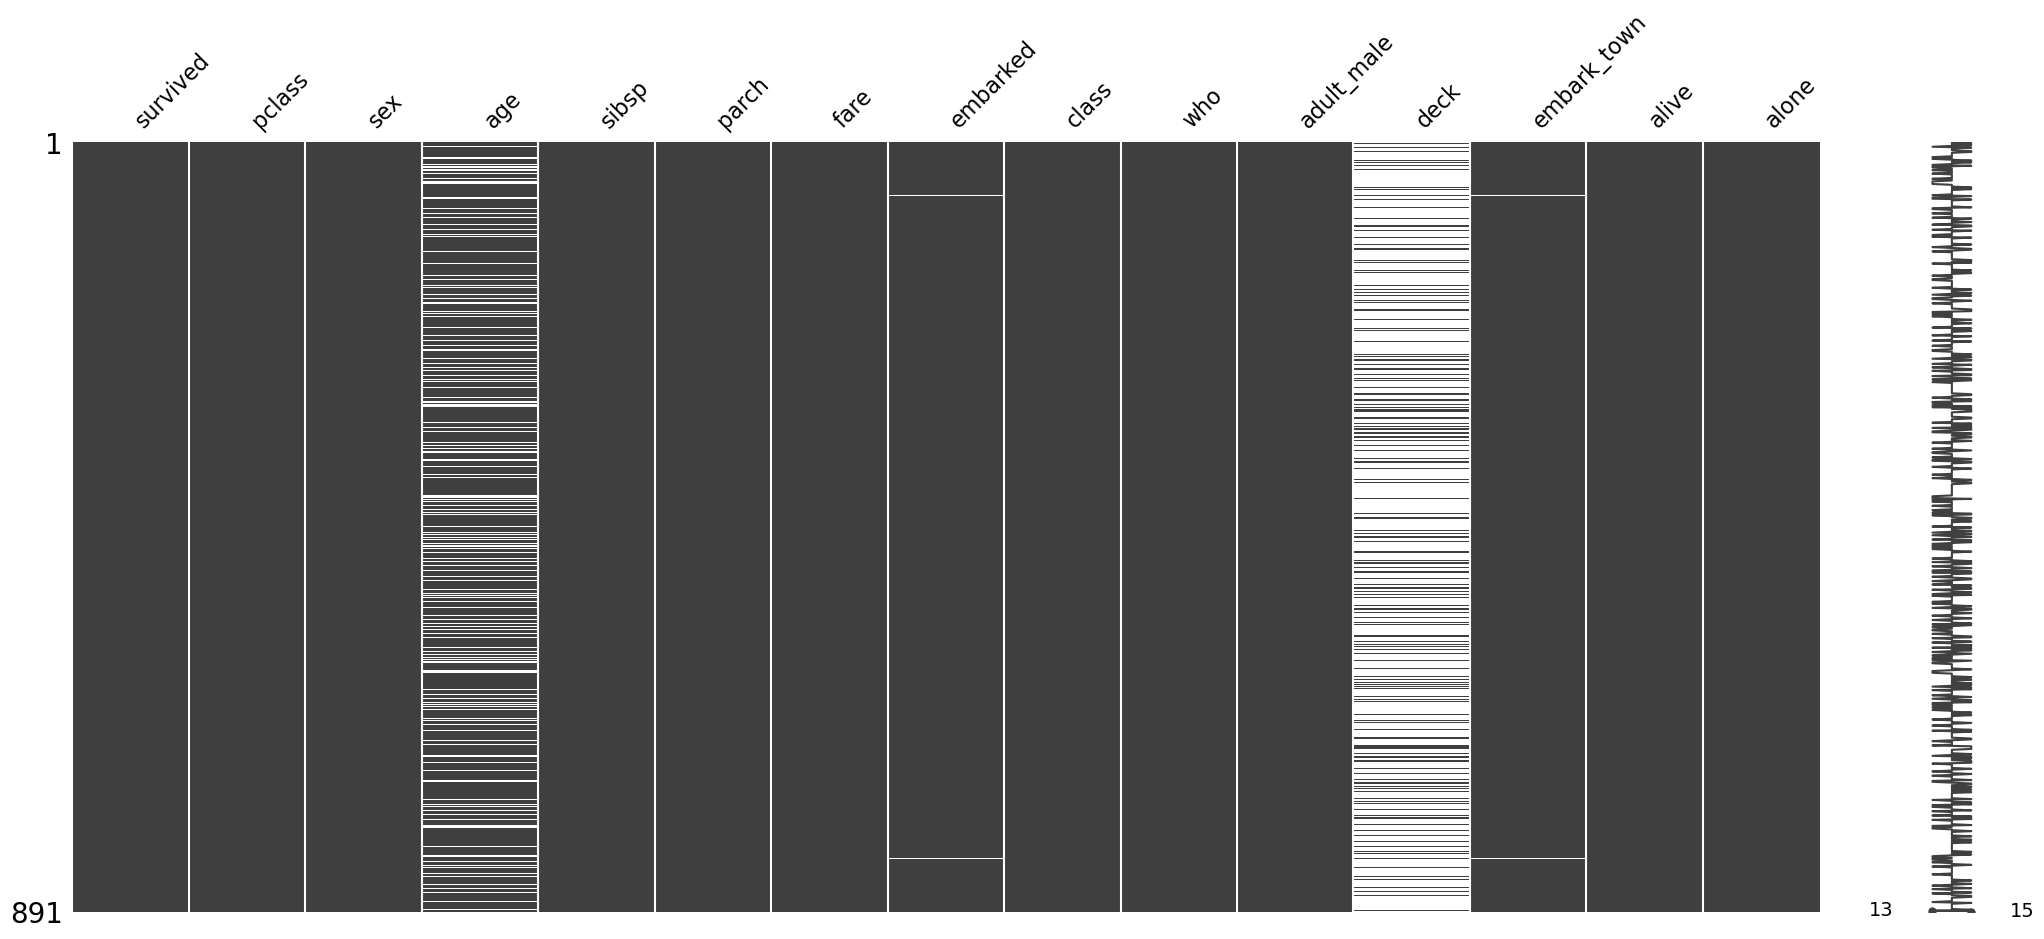

In [172]:
msno.matrix(df)

In [173]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [174]:
# Seleccionar variables relevantes para imputación (numéricas y categóricas)
vars_cat = ['embarked', 'deck', 'embark_town', 'sex', 'class', 'who']

In [175]:
vars_num = ['age', 'fare', 'sibsp', 'parch', 'pclass', 'survived']

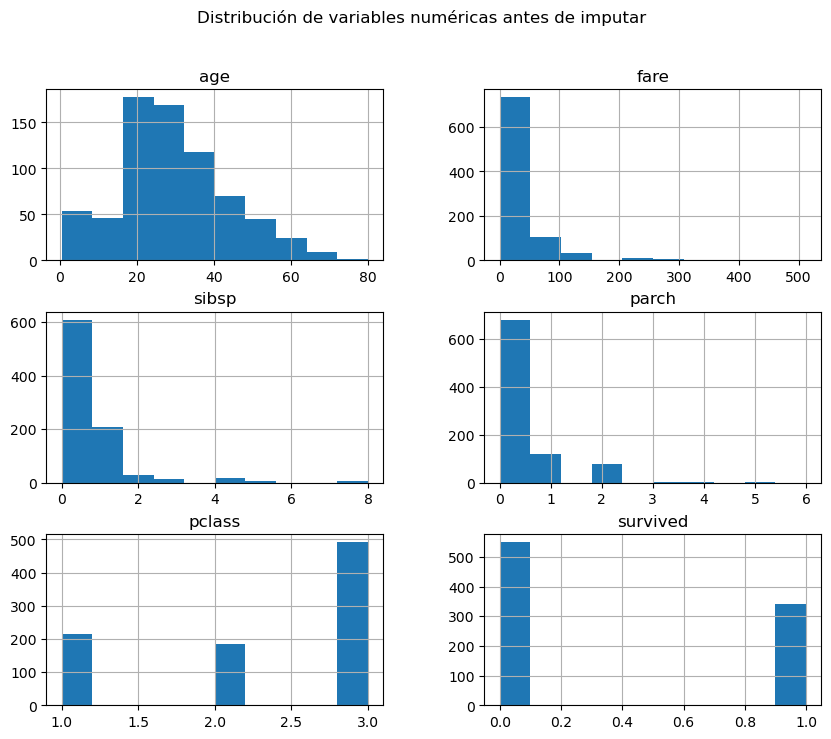

In [176]:
# Visualizar distribución de variables numéricas antes de imputar
df[vars_num].hist(figsize=(10,8))
plt.suptitle("Distribución de variables numéricas antes de imputar")
plt.show()

In [177]:
df[vars_num].isnull().sum()

age         177
fare          0
sibsp         0
parch         0
pclass        0
survived      0
dtype: int64

In [178]:
df[vars_num]

,age,fare,sibsp,parch,pclass,survived
0,22.0,7.2500,1,0,3,0
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,3,1
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,3,0
...,...,...,...,...,...,...
886,27.0,13.0000,0,0,2,0
887,19.0,30.0000,0,0,1,1
888,NaN,23.4500,1,2,3,0
889,26.0,30.0000,0,0,1,1


In [179]:
# 3. Imputación de variables numéricas

# a) Imputación con la mediana (robusta a outliers)
median_imputer = SimpleImputer(strategy='median')
df_num_median = pd.DataFrame(median_imputer.fit_transform(df[vars_num]), columns=vars_num)

In [180]:
# b) Imputación con KNN (considerando todas las numéricas seleccionadas)
knn_imputer = KNNImputer(n_neighbors=5)
df_num_knn = pd.DataFrame(knn_imputer.fit_transform(df[vars_num]), columns=vars_num)


In [181]:
# c) Imputación con IterativeImputer (MICE)
iter_imputer = IterativeImputer(random_state=0, max_iter=10)
df_num_iter = pd.DataFrame(iter_imputer.fit_transform(df[vars_num]), columns=vars_num)


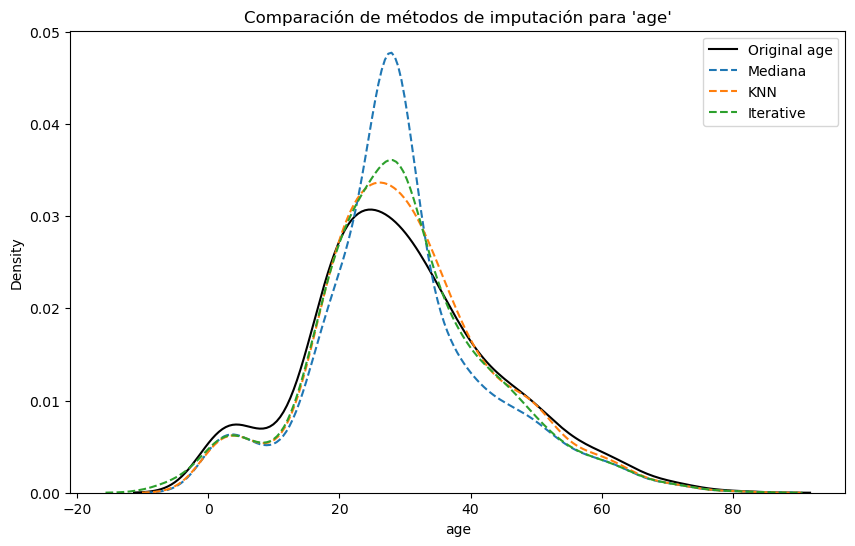

In [182]:
# Comparar distribuciones tras imputación para 'age' y 'fare'
plt.figure(figsize=(10,6))
sns.kdeplot(df['age'], label='Original age', color='black')
sns.kdeplot(df_num_median['age'], label='Mediana', linestyle='--')
sns.kdeplot(df_num_knn['age'], label='KNN', linestyle='--')
sns.kdeplot(df_num_iter['age'], label='Iterative', linestyle='--')
plt.title("Comparación de métodos de imputación para 'age'")
plt.legend()
plt.show()

## Ejemplo 2:

Diamonds Dataset, contiene información detallada sobre **más de 53,000 diamantes**, incluyendo características físicas, calidad y precio. Cada fila representa un diamante individual.

Features:
- **carat**: Peso del diamante (en quilates).
- **cut**: Calidad del corte (Fair, Good, Very Good, Premium, Ideal).
- **color**: Color del diamante, de J (peor) a D (mejor).
- **clarity**: Pureza del diamante (de I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).
- **depth**: Profundidad total como porcentaje del ancho promedio.
- **table**: Ancho de la parte superior del diamante como porcentaje del ancho promedio.
- **price**: Precio en dólares estadounidenses.
- **x**: Longitud en milímetros.
- **y**: Ancho en milímetros.
- **z**: Profundidad en milímetros.

In [183]:
df_diamonds = pd.read_csv('diamonds_faltantes.csv', index_col=0)

In [184]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,NaN,326.0,3.95,3.98,2.43
1,0.21,NaN,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,NaN,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [202]:
print("Valores faltantes por columna:")
print(df_diamonds.isnull().sum())


Valores faltantes por columna:
carat      5407
cut        2643
color      2666
clarity    2704
depth      5403
table      5395
price      5458
x             0
y             0
z             0
dtype: int64


In [187]:
df_diamonds.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [205]:
df_diamonds.select_dtypes('object').columns.to_list()

['cut', 'color', 'clarity']

In [207]:
df_diamonds.select_dtypes('number').columns.to_list()

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

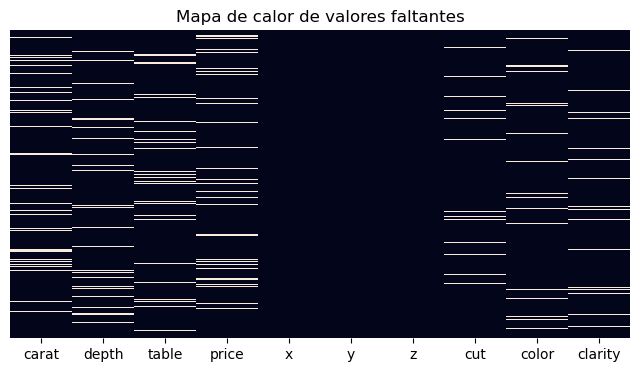

In [208]:
# Seleccionar variables numéricas y categóricas
vars_num = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
vars_cat = ['cut', 'color', 'clarity']

# Visualización de valores faltantes
plt.figure(figsize=(8,4))
sns.heatmap(df_diamonds[vars_num + vars_cat].isnull(), cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()


<Axes: >

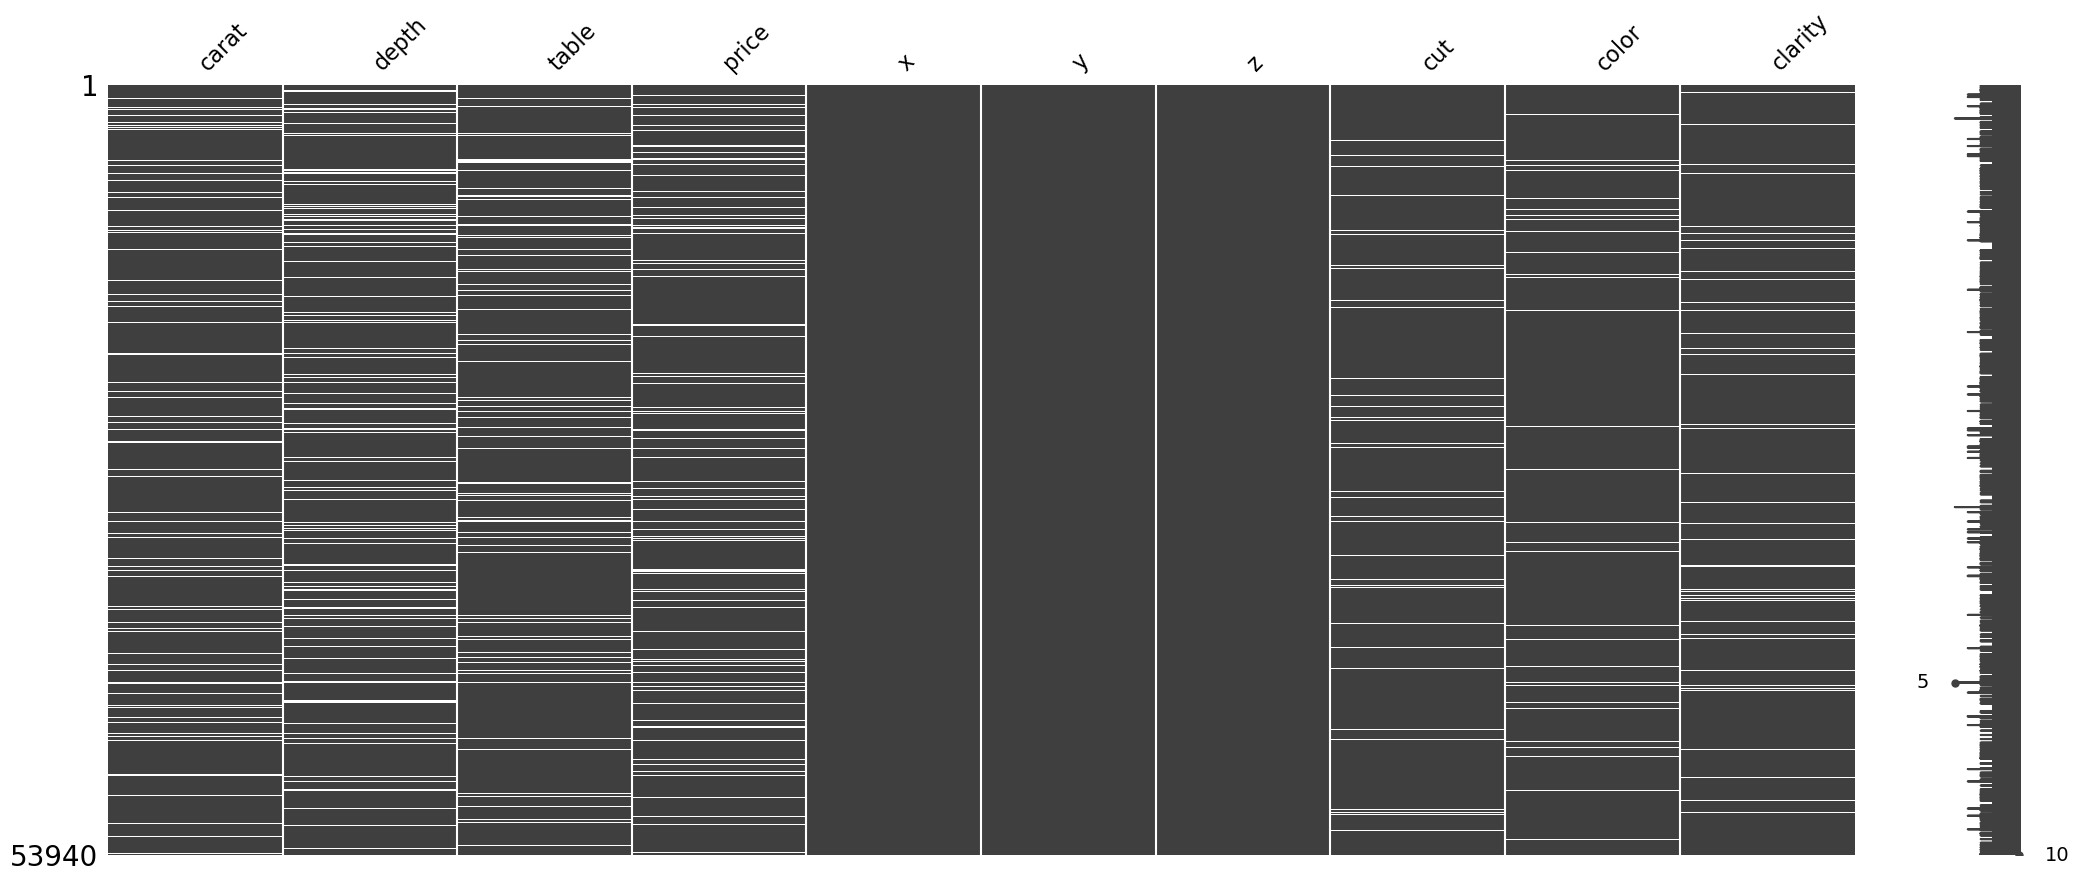

In [217]:
msno.matrix(df_diamonds[vars_num + vars_cat])

In [209]:
# Imputación con la media (numéricas)
mean_imputer = SimpleImputer(strategy='mean')
df_num_mean = pd.DataFrame(mean_imputer.fit_transform(df_diamonds[vars_num]), columns=vars_num)


In [210]:
# Imputación con la mediana (numéricas)
median_imputer = SimpleImputer(strategy='median')
df_num_median = pd.DataFrame(median_imputer.fit_transform(df_diamonds[vars_num]), columns=vars_num)


In [211]:
# Imputación con KNN (numéricas)
knn_imputer = KNNImputer(n_neighbors=5)
df_num_knn = pd.DataFrame(knn_imputer.fit_transform(df_diamonds[vars_num]), columns=vars_num)


In [212]:
# Imputación con IterativeImputer (MICE, numéricas)
iter_imputer = IterativeImputer(random_state=0, max_iter=10)
df_num_iter = pd.DataFrame(iter_imputer.fit_transform(df_diamonds[vars_num]), columns=vars_num)


In [213]:
# Imputación forward fill y backward fill (numéricas)
df_num_ffill = df_diamonds[vars_num].ffill()
df_num_bfill = df_diamonds[vars_num].bfill()


In [214]:
# Imputación aleatoria (numéricas)
df_num_random = df_diamonds[vars_num].copy()
for col in vars_num:
    mask = df_num_random[col].isnull()
    df_num_random.loc[mask, col] = np.random.choice(df_num_random[col].dropna(), size=mask.sum())

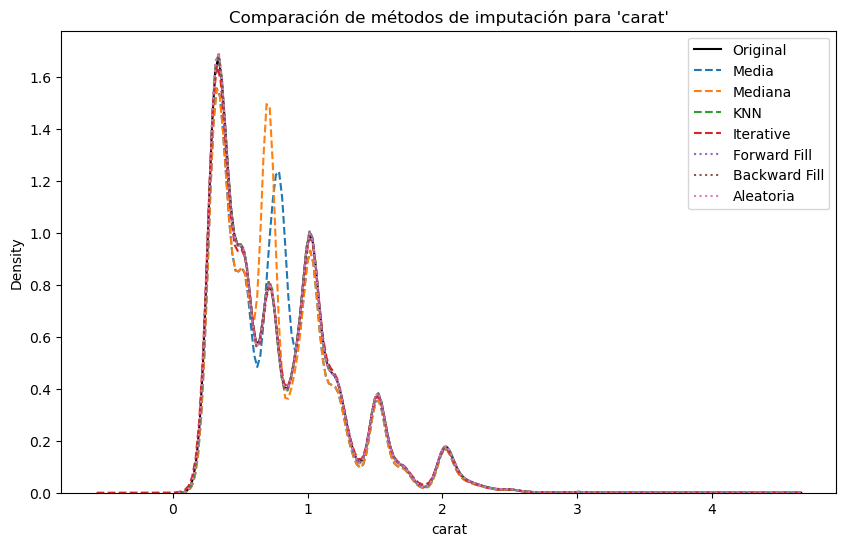

In [215]:
# Visualización comparativa de imputaciones para 'carat'
plt.figure(figsize=(10,6))
sns.kdeplot(df_diamonds['carat'], label='Original', color='black')
sns.kdeplot(df_num_mean['carat'], label='Media', linestyle='--')
sns.kdeplot(df_num_median['carat'], label='Mediana', linestyle='--')
sns.kdeplot(df_num_knn['carat'], label='KNN', linestyle='--')
sns.kdeplot(df_num_iter['carat'], label='Iterative', linestyle='--')
sns.kdeplot(df_num_ffill['carat'], label='Forward Fill', linestyle=':')
sns.kdeplot(df_num_bfill['carat'], label='Backward Fill', linestyle=':')
sns.kdeplot(df_num_random['carat'], label='Aleatoria', linestyle=':')
plt.title("Comparación de métodos de imputación para 'carat'")
plt.legend()
plt.show()

In [216]:
# Imputación por la moda (categóricas)
mode_imputer = SimpleImputer(strategy='most_frequent')
df_cat_mode = pd.DataFrame(mode_imputer.fit_transform(df_diamonds[vars_cat]), columns=vars_cat)

print("Valores faltantes después de imputar variables categóricas por la moda:")
print(df_cat_mode.isnull().sum())

Valores faltantes después de imputar variables categóricas por la moda:
cut        0
color      0
clarity    0
dtype: int64


No existe una forma perfecta de tratar los valores perdidos. Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos. 

Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, se debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.


### Bibliografía
- Rubin, D. B. (1976). Inference and missing data. *Biometrika*, 63(3), 581-592.
- Little, R. J. A., & Rubin, D. B. (2019). *Statistical Analysis with Missing Data* (3rd ed.). Wiley.
- Schafer, J. L., & Graham, J. W. (2002). Missing data: our view of the state of the art. *Psychological Methods*, 7(2), 147–177.
- Enders, C. K. (2010). *Applied Missing Data Analysis*. Guilford Press.
- Van Buuren, S. (2018). *Flexible Imputation of Missing Data* (2nd ed.). CRC Press.